In [40]:
def get_technical_indicators(dataset,ticker):
    dataset['ma7'] = dataset[ticker].rolling(window=7).mean()
    dataset['ma21'] = dataset[ticker].rolling(window=21).mean()
    dataset['26ema']=dataset[ticker].ewm(span=26).mean()
    dataset['12ema']=dataset[ticker].ewm(span=12).mean()

    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    dataset['20sd'] = dataset[ticker].rolling(window=20).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)

    # Create Exponential moving average
    dataset['ema'] = dataset[ticker].ewm(com=0.5).mean()

    # Create Momentum
    dataset['momentum'] = dataset[ticker]-1
    
    return dataset

In [46]:
import datetime
import pandas_datareader.data as web
import bert
import pandas as pd
from loadstocks import loadStocksByTickers
from loadstocks import loadAuNotNaTickersFromYahooExcel
months=72
end = datetime.date.today()
day=end.day
year=end.year-months//12-1
month=months%12+1
start=datetime.datetime(year,month,day)
ticker='ASX.AX'
y=web.DataReader(ticker,"yahoo",start,end)['Adj Close']   

dataset=pd.DataFrame()
dataset[ticker]=y
get_technical_indicators(dataset,ticker)

,ASX.AX,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
Date,,,,,,,,,,,
2012-01-15,21.421740,NaN,NaN,21.421740,21.421740,0.000000,NaN,NaN,NaN,21.421740,20.421740
2012-01-16,21.612047,NaN,NaN,21.520553,21.524823,0.004270,NaN,NaN,NaN,21.564470,20.612047
2012-01-17,21.534508,NaN,NaN,21.525567,21.528603,0.003036,NaN,NaN,NaN,21.543727,20.534508
2012-01-18,21.569736,NaN,NaN,21.537915,21.541587,0.003672,NaN,NaN,NaN,21.561283,20.569736
2012-01-19,21.675488,NaN,NaN,21.569818,21.577967,0.008149,NaN,NaN,NaN,21.637734,20.675488
2012-01-22,21.527420,NaN,NaN,21.561326,21.565682,0.004355,NaN,NaN,NaN,21.564090,20.527420
2012-01-23,21.358301,21.528463,NaN,21.525219,21.519405,-0.005814,NaN,NaN,NaN,21.426835,20.358301
2012-01-24,21.471069,21.535510,NaN,21.516494,21.509318,-0.007176,NaN,NaN,NaN,21.456329,20.471069
2012-01-26,21.534508,21.524433,NaN,21.519164,21.514302,-0.004863,NaN,NaN,NaN,21.508451,20.534508


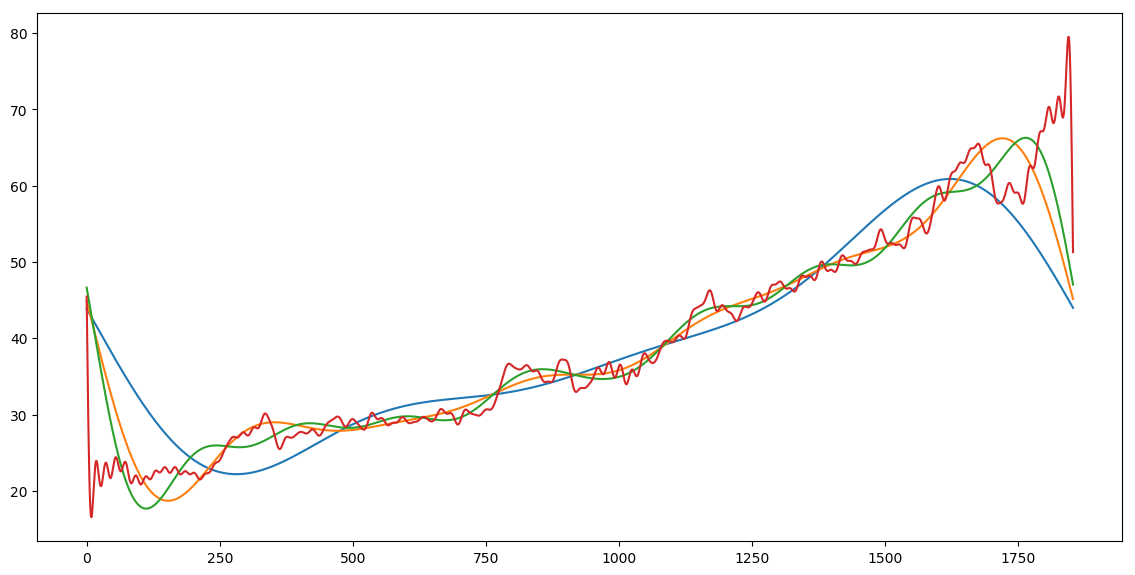

In [82]:
# Create MAC
import numpy as np
data_FT = dataset[[ticker]]

close_fft = np.fft.fft(np.asarray(data_FT[ticker].tolist()))

fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
import matplotlib.pylab as plt
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())

for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))


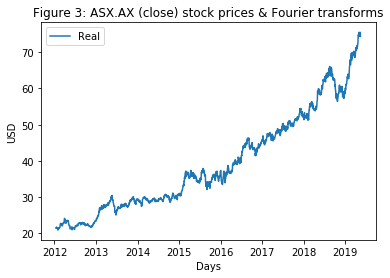

In [79]:
plt.plot(data_FT[ticker],  label='Real')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 3: '+ticker+' (close) stock prices & Fourier transforms')
plt.legend()
plt.show()

In [113]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
d=pd.DataFrame(dataset[ticker].resample('W').mean())
print(d)
model = ARIMA(d, order=(5,1,0))
model_fit = model.fit(disp=False)
     

pred=model_fit.forecast(steps=1)
test=d[-1:]
print(test)
print('pred')
print(pred)
pred_df=pd.DataFrame(pred,index=test.index)

#pred_ci.loc[y.index[-1]]=[y[-1],y[-1]]
#pred_ci=pred_ci.sort_index()
ax = data_FT[ticker].plot(label='observed')


pred.plot(ax=ax, label='Forecast', alpha=.7)

ax.fill_between(pred.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color='k', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel(ticker)
plt.legend()

plt.show()

               ASX.AX
Date                 
2012-01-15  21.421740
2012-01-22  21.583840
2012-01-29  21.453438
2012-02-05  21.118616
2012-02-12  21.464010
2012-02-19  21.486565
2012-02-26  22.543659
2012-03-04  22.556356
2012-03-11  22.196147
2012-03-18  22.573795
2012-03-25  22.810537
2012-04-01  23.582134
2012-04-08  23.676535
2012-04-15  23.048369
2012-04-22  23.390052
2012-04-29  23.438714
2012-05-06  23.114081
2012-05-13  22.145322
2012-05-20  21.786572
2012-05-27  21.392947
2012-06-03  21.530933
2012-06-10  21.321763
2012-06-17  21.408937
2012-06-24  21.368263
2012-07-01  21.273859
2012-07-08  22.021869
2012-07-15  21.896928
2012-07-22  22.242633
2012-07-29  22.309434
2012-08-05  22.734986
...               ...
2018-10-28  57.333167
2018-11-04  58.285406
2018-11-11  59.725572
2018-11-18  60.069875
2018-11-25  59.278964
2018-12-02  60.040363
2018-12-09  58.970076
2018-12-16  58.373941
2018-12-23  57.624347
2018-12-30  59.019918
2019-01-06  59.724096
2019-01-13  61.039824
2019-01-20

TypeError: DataFrame constructor called with incompatible data and dtype: could not broadcast input array from shape (2) into shape (1)